# Explore here

In [3]:
!pip install missingno lazypredict
!pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [5]:
df = pd.read_csv('/workspaces/machine-learning-python-CA-template/data/raw/student_lifestyle_dataset.csv')
pd.set_option('display.max_columns', None)
df.head()



,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.90,3.80,8.70,2.80,1.80,2.99,Moderate
1,2,5.30,3.50,8.00,4.20,3.00,2.75,Low
2,3,5.10,3.90,9.20,1.20,4.60,2.67,Low
3,4,6.50,2.10,7.20,1.70,6.50,2.88,Moderate
4,5,8.10,0.60,6.50,2.20,6.60,3.51,High


In [6]:
# Dimensiones del DF
df.shape

(2000, 8)

In [7]:
# tipo de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
#valores únicos en las columnas
n_unicos = df.nunique()
n_unicos

Student_ID                         2000
Study_Hours_Per_Day                  51
Extracurricular_Hours_Per_Day        41
Sleep_Hours_Per_Day                  51
Social_Hours_Per_Day                 61
Physical_Activity_Hours_Per_Day     118
GPA                                 158
Stress_Level                          3
dtype: int64

<Axes: >

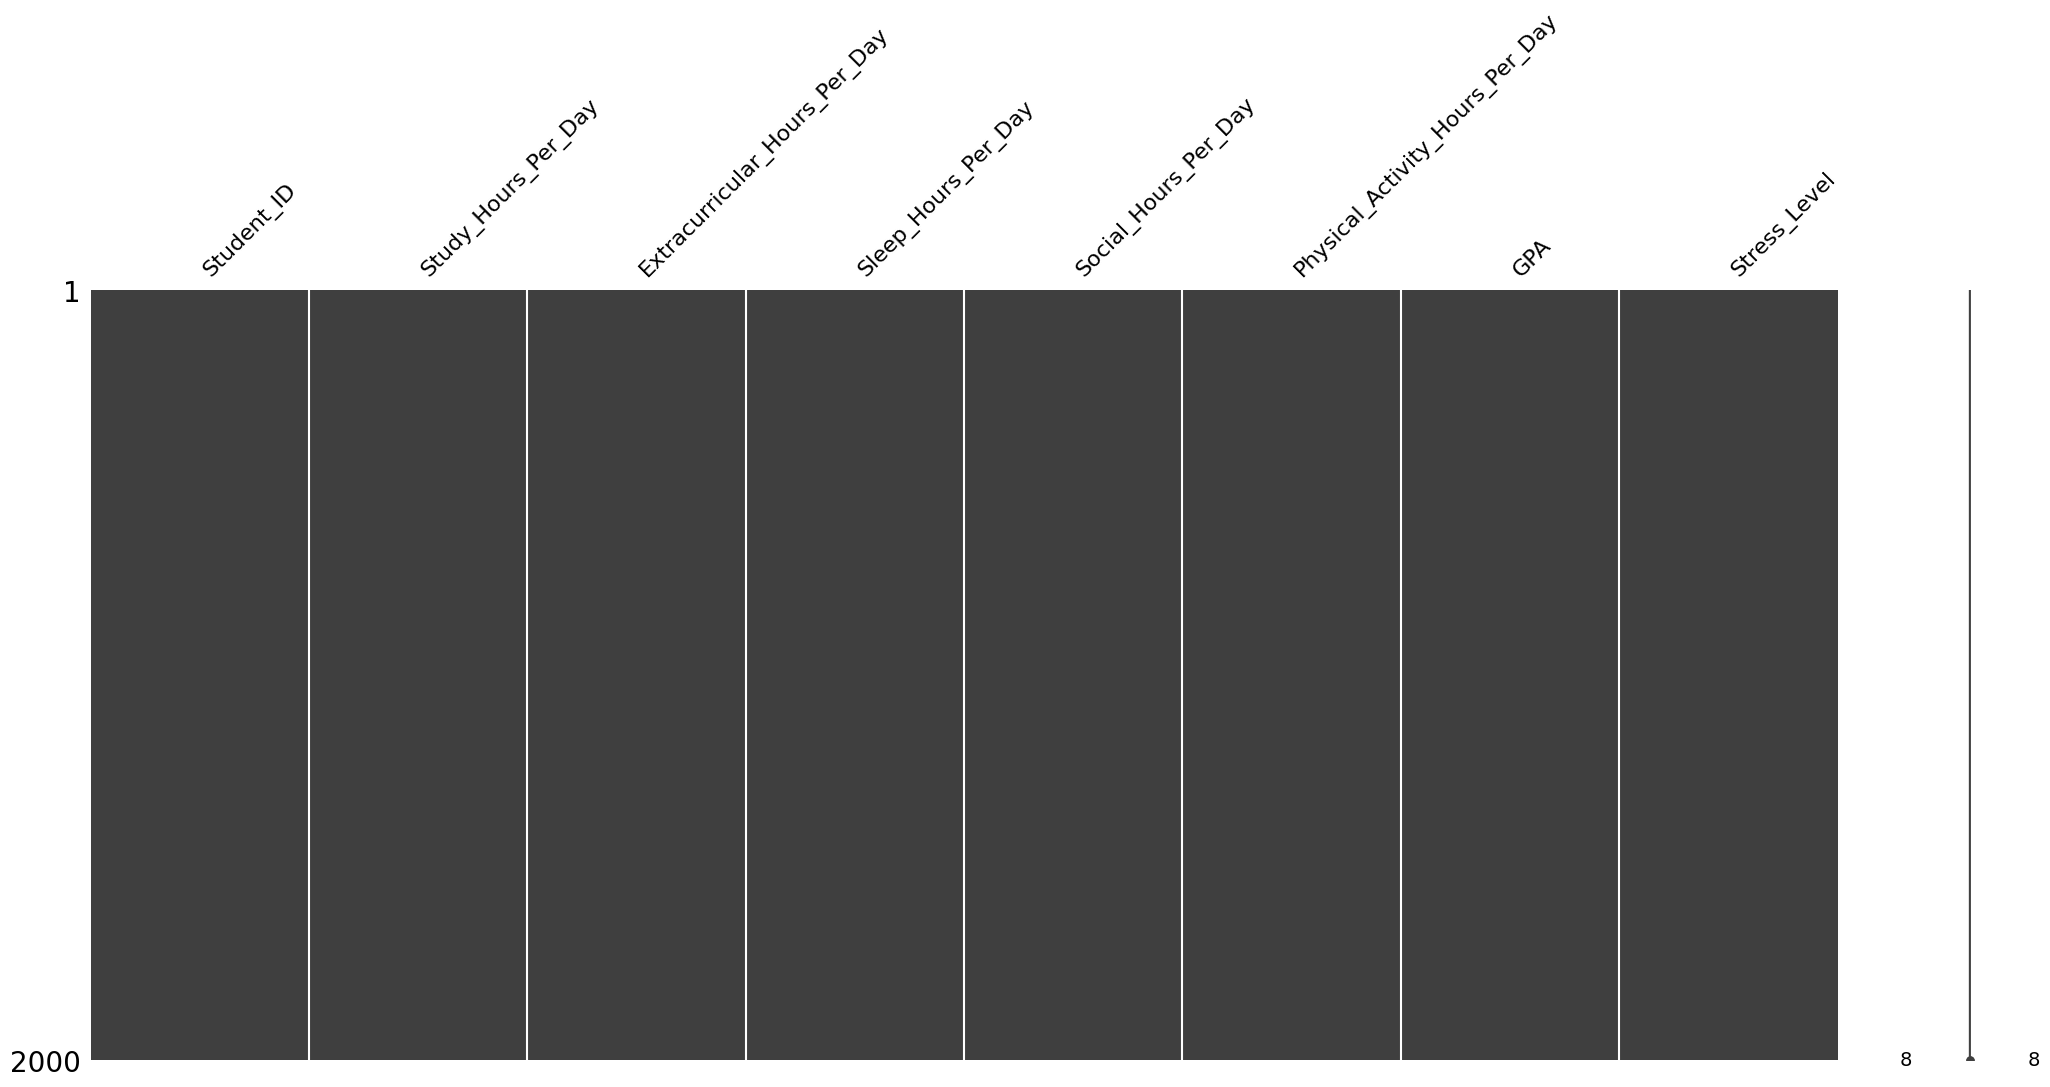

In [10]:
msno.matrix(df)

In [11]:
# ELiminiamos las columnas que no aportan informacion importante
df.drop(['Student_ID'], axis=1, inplace=True)
df.shape

(2000, 7)

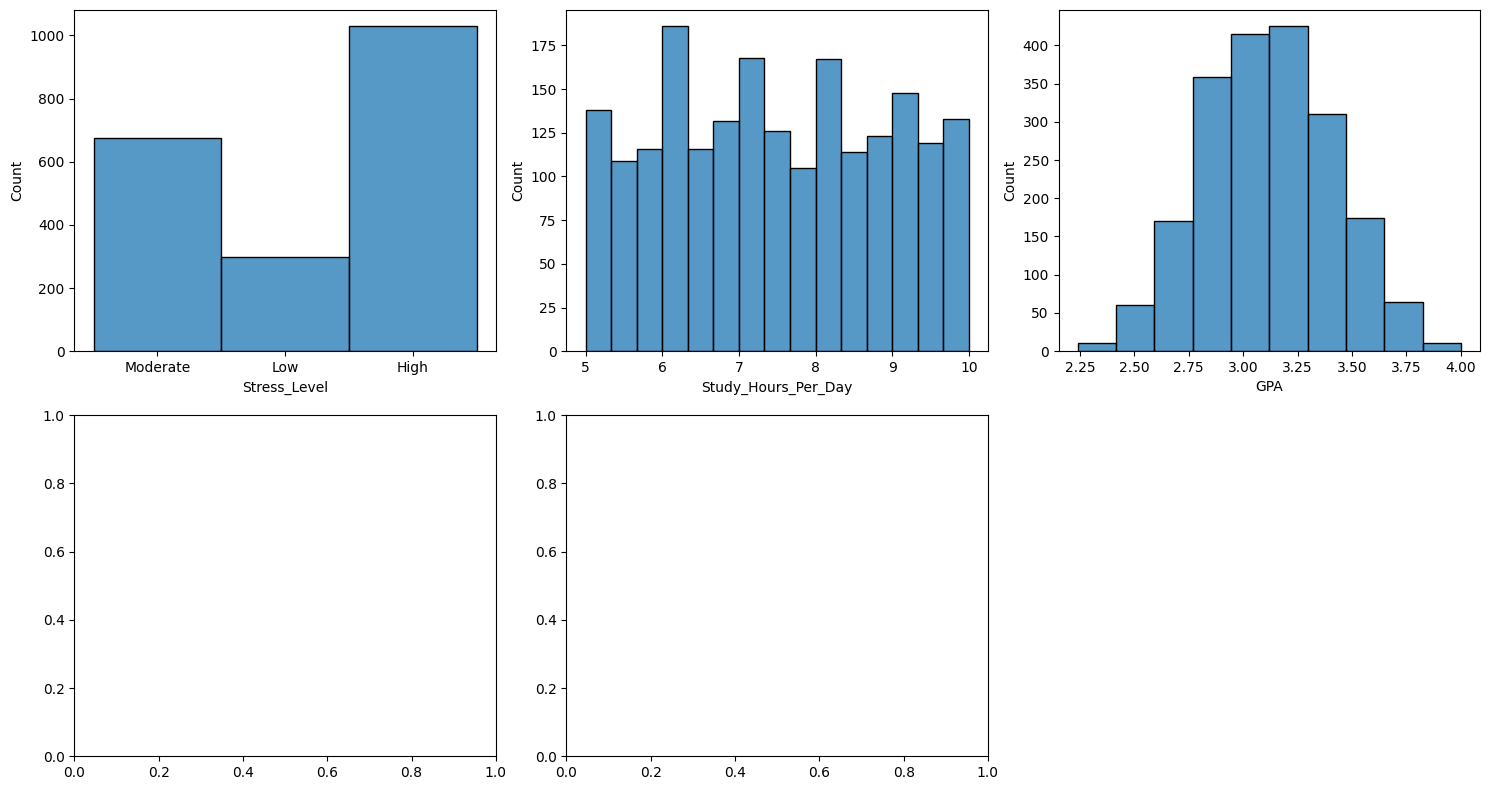

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico con subgráficas
fig, axis = plt.subplots(2, 3, figsize=(15, 8))
fig.delaxes(axis[1, 2])  # Eliminamos el tercer gráfico de la segunda fila

# Variables categóricas de interés
# Como ejemplo, uso 'Stress_Level' que es de tipo objeto
sns.histplot(ax=axis[0, 0], data=df, x="Stress_Level")

# Si hubiera más variables categóricas, podrías incluirlas aquí de manera similar.
# En este caso, no tienes otras variables categóricas claras, pero se podrían analizar las numéricas o transformadas en categóricas.

# Si necesitas hacer histograma de alguna variable numérica, puedes hacerlo también:
sns.histplot(ax=axis[0, 1], data=df, x="Study_Hours_Per_Day", bins=15)
sns.histplot(ax=axis[0, 2], data=df, x="GPA", bins=10)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


Tras realizar un análisis univariante, hemos obtenido los siguientes insights:

Estrés de los estudiantes: Los estudiantes con más horas de estudio parecen tener niveles más altos de estrés, mientras que aquellos con más horas de actividad extracurricular presentan niveles de estrés más bajos.
Horas de estudio vs GPA: La relación entre las horas de estudio y el GPA parece mostrar que los estudiantes con mayor GPA dedican más tiempo al estudio.
Actividad física: Muchos estudiantes no reportan horas de actividad física, lo que podría sugerir que la actividad física no es una prioridad o que estos datos están incompletos.
Disponibilidad o tiempo dedicado: Aunque no tenemos información directa sobre la disponibilidad anual, podemos observar que los estudiantes con más tiempo dedicado a actividades extracurricular y físicas tienen una menor carga de estrés.

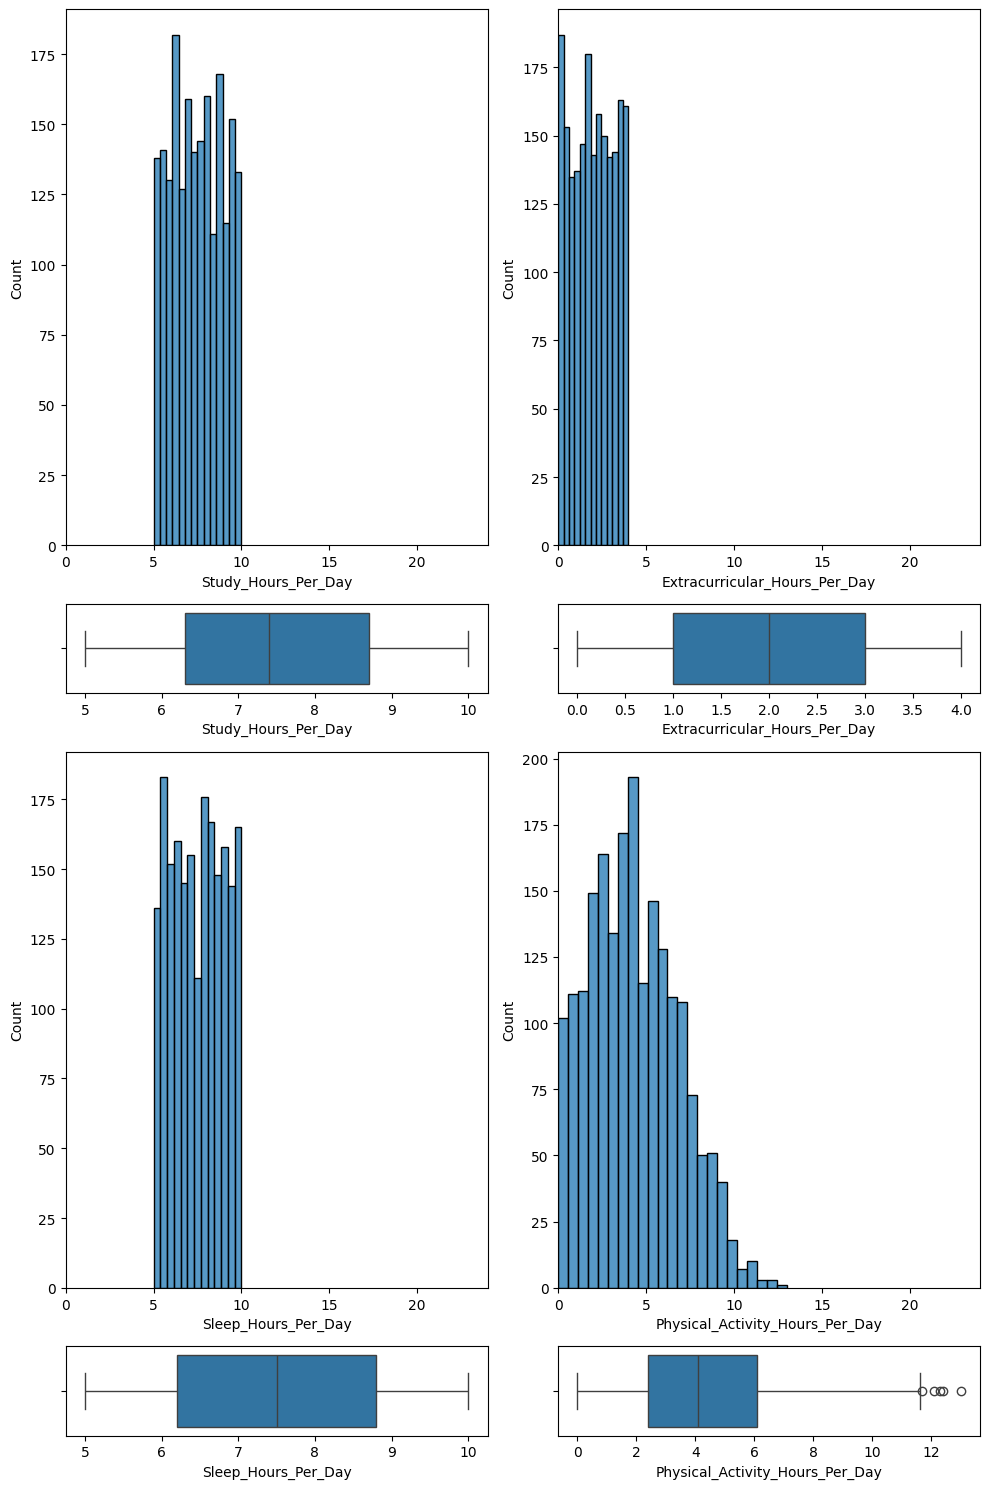

In [13]:
# Análisis de variables univariantes numéricas
fig, axis = plt.subplots(4, 2, figsize=(10, 15), gridspec_kw={"height_ratios": [6, 1, 6, 1]})

# Histograma y boxplot de 'Study_Hours_Per_Day'
sns.histplot(ax = axis[0, 0], data = df, x = "Study_Hours_Per_Day").set_xlim(0, 24)
sns.boxplot(ax = axis[1, 0], data = df, x = "Study_Hours_Per_Day")

# Histograma y boxplot de 'Extracurricular_Hours_Per_Day'
sns.histplot(ax = axis[0, 1], data = df, x = "Extracurricular_Hours_Per_Day").set_xlim(0, 24)
sns.boxplot(ax = axis[1, 1], data = df, x = "Extracurricular_Hours_Per_Day")

# Histograma y boxplot de 'Sleep_Hours_Per_Day'
sns.histplot(ax = axis[2, 0], data = df, x = "Sleep_Hours_Per_Day").set_xlim(0, 24)
sns.boxplot(ax = axis[3, 0], data = df, x = "Sleep_Hours_Per_Day")

# Histograma y boxplot de 'Physical_Activity_Hours_Per_Day'
sns.histplot(ax = axis[2, 1], data = df, x = "Physical_Activity_Hours_Per_Day").set_xlim(0, 24)
sns.boxplot(ax = axis[3, 1], data = df, x = "Physical_Activity_Hours_Per_Day")

# Ajustar el layout y mostrar las gráficas
plt.tight_layout()
plt.show()


Conclusión:

La mayoría de los estudiantes en el dataset dedica entre 1 y 8 horas al estudio cada día, lo que parece ser un comportamiento razonable.
Las horas dedicadas a actividades extracurriculares son relativamente bajas (0-4 horas/día).
En términos de sueño, la mayoría de los estudiantes duerme entre 6 y 8 horas, lo que es saludable, aunque algunos valores atípicos pueden indicar problemas con la calidad o cantidad del sueño.
En cuanto a la actividad física, la mayoría de los estudiantes no dedica mucho tiempo a hacer ejercicio (menos de 1 hora al día).
Los GPAs se distribuyen principalmente entre 2.5 y 4.0, lo que es positivo en términos de rendimiento académico, aunque algunos estudiantes podrían tener dificultades.

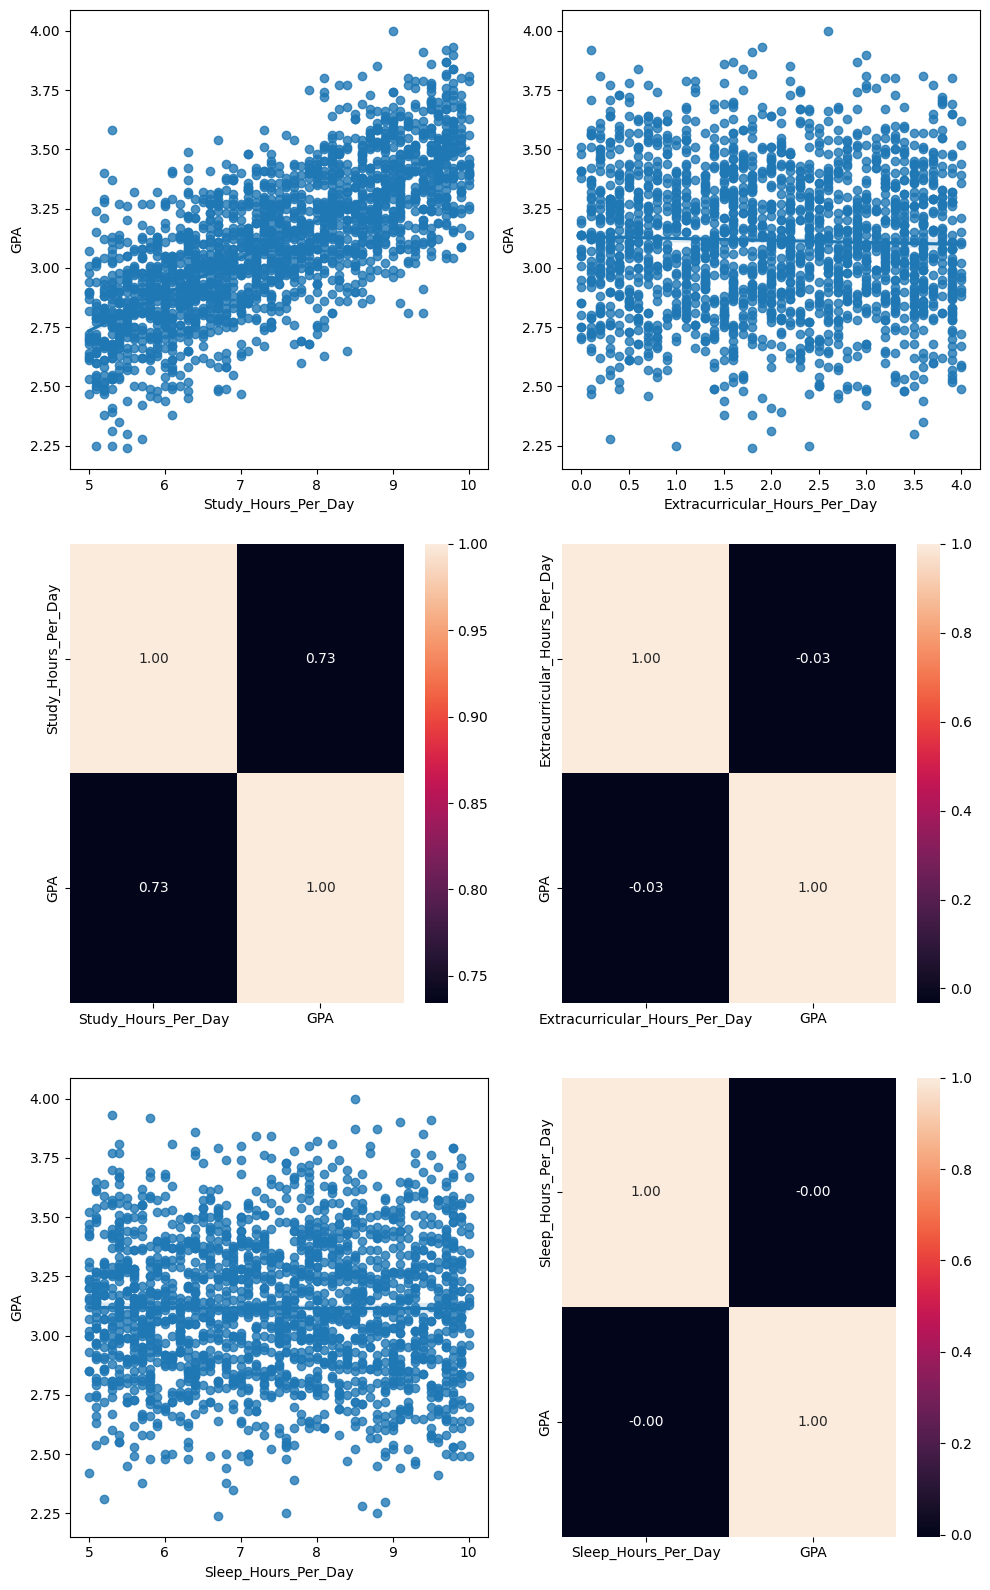

In [14]:
# Análisis de variables multivariadas
## NUmérico-Numérico

# Crear subgráficos
fig, axis = plt.subplots(3, 2, figsize = (10, 16))

# Relación entre horas de estudio y GPA
sns.regplot(ax = axis[0, 0], data = df, x = "Study_Hours_Per_Day", y = "GPA")
sns.heatmap(df[["Study_Hours_Per_Day", "GPA"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0])

# Relación entre horas extracurriculares y GPA
sns.regplot(ax = axis[0, 1], data = df, x = "Extracurricular_Hours_Per_Day", y = "GPA")
sns.heatmap(df[["Extracurricular_Hours_Per_Day", "GPA"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Relación entre horas de sueño y GPA
sns.regplot(ax = axis[2, 0], data = df, x = "Sleep_Hours_Per_Day", y = "GPA")
sns.heatmap(df[["Sleep_Hours_Per_Day", "GPA"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


Este análisis sugiere que, entre las variables estudiadas, las horas de estudio son el factor más relevante para predecir el GPA de los estudiantes. Sin embargo, las horas de sueño podrían tener un impacto positivo, aunque no tan fuerte. Las actividades extracurriculares, por otro lado, no parecen estar directamente relacionadas con el rendimiento académico en términos de GPA.

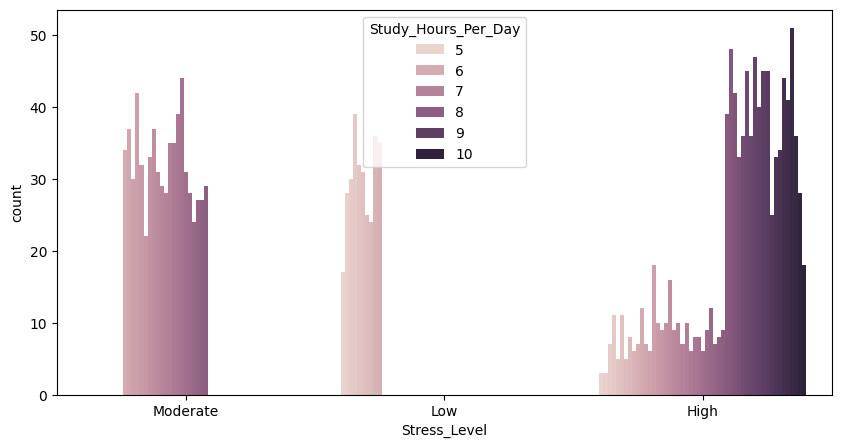

In [15]:
# Análisis Categórico-Categórico
fig, axis = plt.subplots(figsize = (10, 5))

# Crear un gráfico de barras para comparar 'Stress_Level' por 'Study_Hours_Per_Day' (usando un rango de horas de estudio)
sns.countplot(data = df, x = "Stress_Level", hue = "Study_Hours_Per_Day")

# Mostrar el gráfico
plt.show()


Este análisis puede sugerir que, aunque estudiar más horas podría estar relacionado con una mayor preparación académica, también se asocia con mayores niveles de estrés. Es esencial encontrar un balance saludable entre el estudio y el bienestar personal para evitar consecuencias negativas a largo plazo.

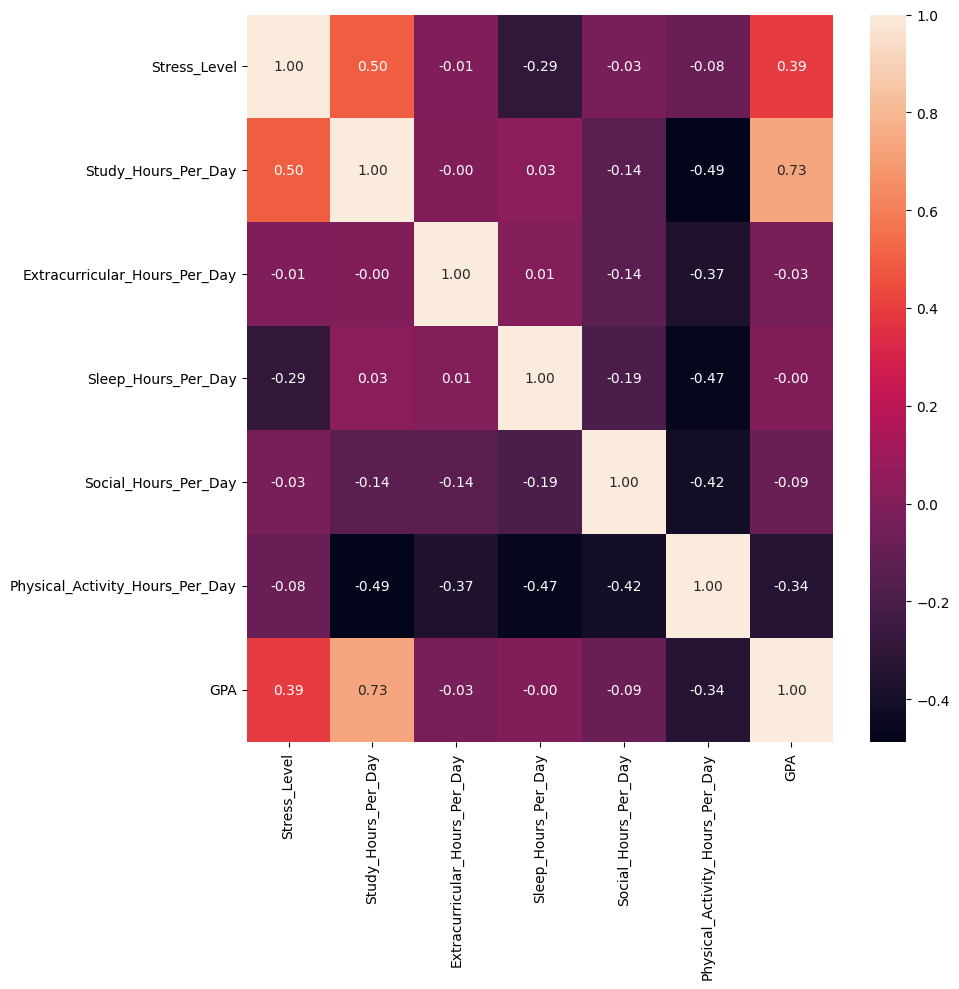

In [16]:
# Factorizamos las variables categóricas
df["Stress_Level"] = pd.factorize(df['Stress_Level'])[0]  # Si 'Stress_Level' es categórica
# Si hay alguna otra variable categórica, puedes agregarla aquí de la siguiente manera:
# df["otra_variable"] = pd.factorize(df['otra_variable'])[0]

# Crear el gráfico de correlación
fig, axes = plt.subplots(figsize=(10, 10))

sns.heatmap(df[["Stress_Level", "Study_Hours_Per_Day", "Extracurricular_Hours_Per_Day", "Sleep_Hours_Per_Day", "Social_Hours_Per_Day", "Physical_Activity_Hours_Per_Day", "GPA"]].corr(), annot=True, fmt=".2f")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


La correlación más alta se encuentra entre las variables Study_Hours_Per_Day y GPA, lo cual tiene sentido, ya que más horas de estudio están asociadas con un mejor rendimiento académico.

Hay una correlación positiva moderada entre las horas de Sleep_Hours_Per_Day y el GPA, lo que sugiere que más horas de sueño podrían tener un impacto en el rendimiento académico.

Se observa una correlación entre Extracurricular_Hours_Per_Day y el GPA, aunque la relación no es tan fuerte. Esto podría indicar que las actividades extracurriculares también pueden influir en el desempeño, pero de manera más indirecta.

A pesar de las correlaciones observadas, ninguna de ellas es extremadamente significativa, lo que sugiere que si bien las variables pueden influir unas sobre otras, probablemente haya otros factores que también juegan un papel importante en el rendimiento académico.

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Study_Hours_Per_Day,2000.00,7.48,1.42,5.00,6.30,7.40,8.70,10.00
Extracurricular_Hours_Per_Day,2000.00,1.99,1.16,0.00,1.00,2.00,3.00,4.00
Sleep_Hours_Per_Day,2000.00,7.50,1.46,5.00,6.20,7.50,8.80,10.00
Social_Hours_Per_Day,2000.00,2.70,1.69,0.00,1.20,2.60,4.10,6.00
Physical_Activity_Hours_Per_Day,2000.00,4.33,2.51,0.00,2.40,4.10,6.10,13.00
GPA,2000.00,3.12,0.30,2.24,2.90,3.11,3.33,4.00
Stress_Level,2000.00,1.18,0.91,0.00,0.00,2.00,2.00,2.00


In [18]:
df.isnull().mean()*100

Study_Hours_Per_Day               0.00
Extracurricular_Hours_Per_Day     0.00
Sleep_Hours_Per_Day               0.00
Social_Hours_Per_Day              0.00
Physical_Activity_Hours_Per_Day   0.00
GPA                               0.00
Stress_Level                      0.00
dtype: float64

In [19]:
import statsmodels.api as sm

# Definimos X y y
X = df.drop(['GPA'], axis=1)  # En lugar de 'price', usamos 'GPA' o cualquier otra variable de interés
y = df['GPA']  # Dependiendo de lo que quieras predecir

# Agregamos la constante para el modelo
X = sm.add_constant(X)

# Ajustamos el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Calculamos la distancia de Cook
cooks_distance = model.get_influence().cooks_distance

# Imprimir los valores de la distancia de Cook para identificar observaciones influyentes
print(cooks_distance)


(array([1.06768153e-06, 7.49058507e-06, 7.18885466e-05, ...,
       8.45348131e-04, 2.10617668e-04, 2.16311437e-04], shape=(2000,)), array([1., 1., 1., ..., 1., 1., 1.], shape=(2000,)))


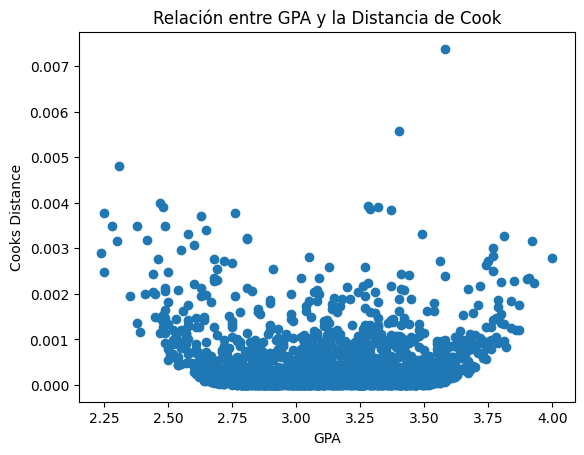

In [20]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Asumimos que el modelo es con 'GPA' como variable dependiente y las demás como independientes
X = df.drop(['GPA'], axis = 1)  # Variables independientes
y = df['GPA']  # Variable dependiente

# Añadimos una constante para el intercepto en el modelo
X = sm.add_constant(X)

# Creamos el modelo OLS
model = sm.OLS(y, X).fit()

# Calculamos la distancia de Cook
cooks_distance = model.get_influence().cooks_distance

# Graficamos la relación entre GPA y la distancia de Cook
plt.scatter(df['GPA'], cooks_distance[0])
plt.xlabel('GPA')  # Variable dependiente (en este caso, GPA)
plt.ylabel('Cooks Distance')
plt.title('Relación entre GPA y la Distancia de Cook')
plt.show()


In [25]:

# Establecer el punto de corte para la distancia de Cook
pto_corte = 4 / len(df)

# Contar las observaciones cuyo valor de distancia de Cook sea mayor que el punto de corte
num_influyentes = len(np.where(cooks_distance[0] > pto_corte)[0])

# Imprimir la cantidad de observaciones influyentes
print(f'Número de observaciones influyentes: {num_influyentes}')



Número de observaciones influyentes: 80


In [29]:
# Obtener los índices de las observaciones influyentes
observaciones_influyentes = np.where(cooks_distance[0] > pto_corte)[0]

# Mostrar los índices de las observaciones influyentes
print(f'Índices de observaciones influyentes: {observaciones_influyentes}')





Índices de observaciones influyentes: [  31   51   60  118  139  150  158  165  185  186  210  216  241  283
  331  337  377  382  405  468  470  479  500  505  512  521  550  574
  601  605  659  701  725  733  764  787  799  825  860  866  870  966
 1014 1019 1020 1055 1074 1123 1172 1173 1217 1229 1246 1305 1326 1339
 1370 1417 1420 1422 1427 1429 1443 1454 1456 1462 1536 1563 1574 1588
 1668 1727 1735 1763 1768 1779 1819 1866 1898 1957]


In [27]:
df.iloc[observaciones_influyentes]


,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
31,5.50,3.30,6.60,1.10,7.50,3.26,1
51,9.00,2.60,8.50,3.10,0.80,4.00,2
60,8.30,1.10,9.80,3.50,1.30,3.67,2
118,5.20,1.00,8.60,5.40,3.80,3.40,1
139,6.80,3.50,7.00,4.90,1.80,3.44,0
...,...,...,...,...,...,...,...
1779,9.20,3.00,5.30,6.00,0.50,3.77,2
1819,6.70,0.40,5.70,0.20,11.00,2.58,2
1866,6.30,2.10,5.10,1.60,8.90,3.49,2
1898,7.90,2.30,7.40,3.30,3.10,3.75,0


In [30]:
# Eliminar observaciones que se consideran influyentes
df_influyente = df.drop(observaciones_influyentes)

# Comprobamos si hay duplicados
print(df_influyente.duplicated().sum())  # Debería devolver 0


0


In [32]:
# Separar las variables independientes de la dependiente
X = df_influyente.drop(['GPA'], axis=1)  # Variable dependiente: GPA
y = df_influyente['GPA']


In [33]:
from sklearn.model_selection import train_test_split

# Partición de los datos en test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
import xgboost as xgb

# Usamos xgb para conocer la importancia de las características
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)

# Crear un dataframe con la importancia de las características
df_importancia = pd.DataFrame({'Feature': X_train.columns, 'Importance': xgb_model.feature_importances_ * 100})

# Ordenamos por importancia
df_importancia = df_importancia.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(df_importancia)

# Seleccionamos las características que presentan más de un 1% de importancia
X_train = X_train[df_importancia[df_importancia.Importance > 1]['Feature'].values]
X_test = X_test[df_importancia[df_importancia.Importance > 1]['Feature'].values]


                           Feature  Importance
0              Study_Hours_Per_Day       58.97
4  Physical_Activity_Hours_Per_Day        9.20
3             Social_Hours_Per_Day        8.71
2              Sleep_Hours_Per_Day        8.37
1    Extracurricular_Hours_Per_Day        7.72
5                     Stress_Level        7.03
